In [1]:
# imports
from sklearn.model_selection import train_test_split
from moduleDatabase import DatabaseMethods
from moduleUtilities import UtilityMethods
from modulePreProcessing import TransformationMethods, FeatureMethods
from moduleModelTraining import TrainingMethods
from moduleMetrics import MetricsMethods

In [2]:
# class instances
db = DatabaseMethods()
ut = UtilityMethods()
tf = TransformationMethods()
fm = FeatureMethods()
train = TrainingMethods()
evaluate = MetricsMethods()

In [3]:
# connect to db and fetch data
df = db.fetch("SELECT * FROM v8")
df.head()

,userId,gsId,gsStartTime,age,sex,education,laptop_usage,smartphone_usage,smoking,family_med_history,...,mmse_pre_binary_binned,moca_pre_init,moca_pre_severity_binned,moca_pre_binary_binned,mmse_post_init,mmse_post_severity_binned,mmse_post_binary_binned,moca_post_init,moca_post_severity_binned,moca_post_binary_binned
0,23,18245,1560929400,70,1,4,0,0,0,1,...,1,19,2,1,21,2,1,23,2,1
1,6,76067,1555499640,61,1,4,1,3,0,1,...,2,24,2,1,29,3,2,26,3,2
2,8,79781,1557928260,83,1,5,1,1,0,0,...,2,25,2,1,25,3,2,22,2,1
3,32,180144,1557315840,71,1,2,0,4,0,0,...,2,27,3,2,29,3,2,25,2,1
4,24,209758,1560933840,75,1,2,0,0,0,1,...,1,21,2,1,18,2,1,19,2,1


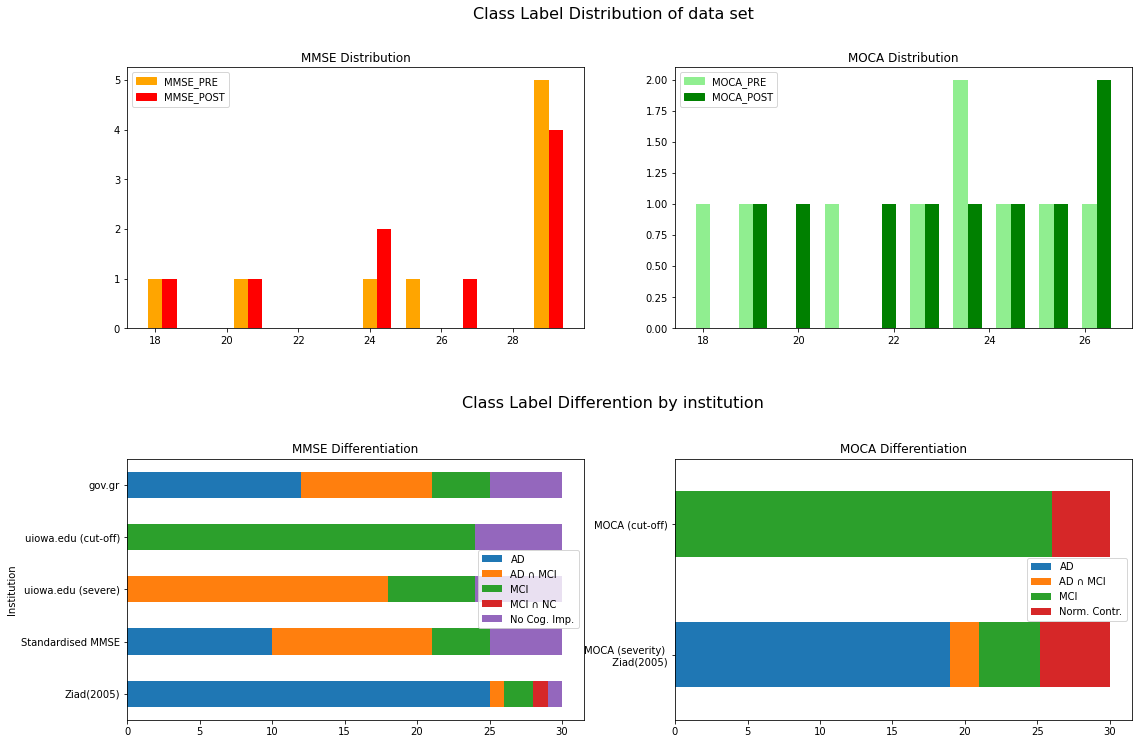

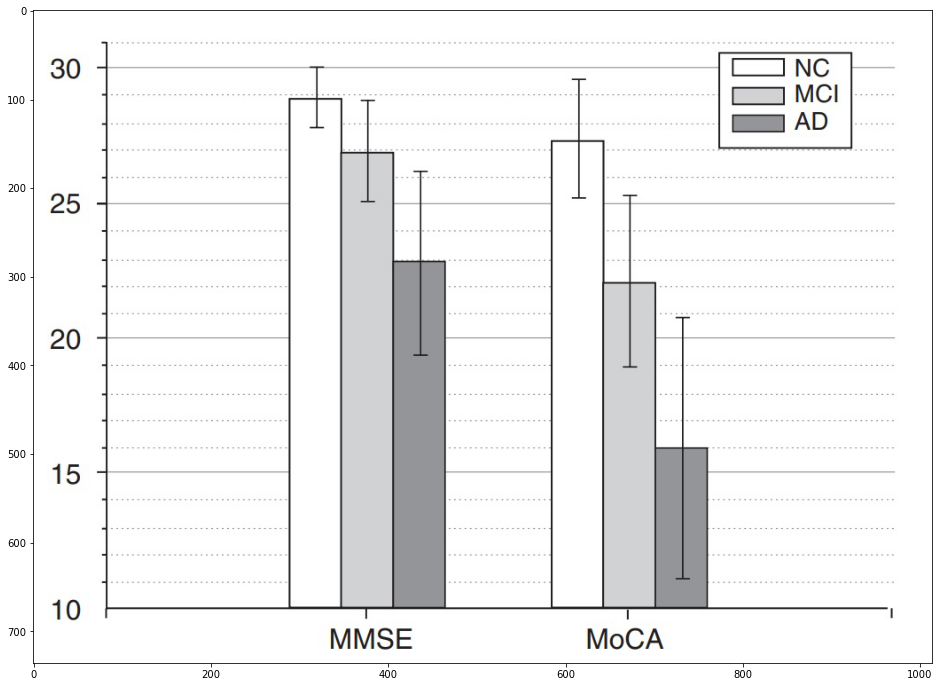

In [4]:
# inspect the distribution of potential target classes
ut.inspect_target_distribution(df)

In [5]:
# define target class (14 available, 6 moca, 6 mmse, 2 diffs)
df = db.separate_target_class(df, "moca_pre_binary_binned")

In [6]:
# Encoding.
# All of categorical are already encoded on database level.
# Here we just apply One-hot-encoding.
columns_to_one_hot_encode = ('marital_status')
df = fm.one_hot_encode_features(df, columns_to_one_hot_encode)

df shape before drop: (119, 20)
df shape after drop, before ohe: (119, 19)
df shape after ohe: (119, 21)


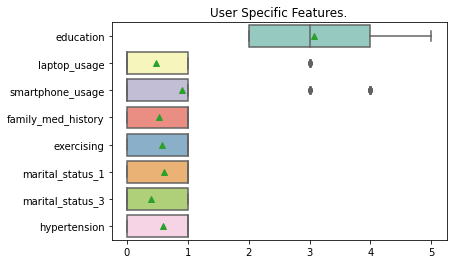

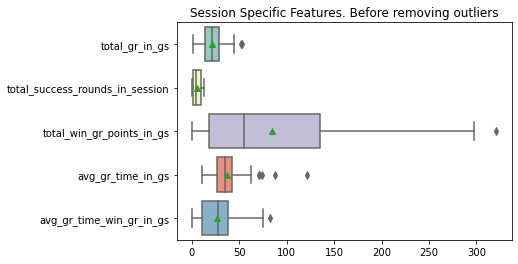

for feature  userId  median: 23.0  mean: 17.781512605042018  q3: 24.0
for feature  gsId  median: 2398795.0  mean: 2835127.2016806724  q3: 4342314.5
for feature  gsStartTime  median: 1558698660.0  mean: 1558614515.2941177  q3: 1560347880.0
for feature  age  median: 75.0  mean: 75.15126050420169  q3: 80.0
for feature  sex  median: 1.0  mean: 0.8403361344537815  q3: 1.0
for feature  education  median: 3.0  mean: 3.0672268907563027  q3: 4.0
for feature  laptop_usage  median: 0.0  mean: 0.4789915966386555  q3: 1.0
for feature  smartphone_usage  median: 0.0  mean: 0.8991596638655462  q3: 1.0
for feature  smoking  median: 0.0  mean: 0.07563025210084033  q3: 0.0
for feature  family_med_history  median: 1.0  mean: 0.5210084033613446  q3: 1.0
for feature  exercising  median: 1.0  mean: 0.5714285714285714  q3: 1.0
for feature  depression  median: 0.0  mean: 0.08403361344537816  q3: 0.0
for feature  hypertension  median: 1.0  mean: 0.5882352941176471  q3: 1.0
for feature  total_gr_in_gs  median: 2

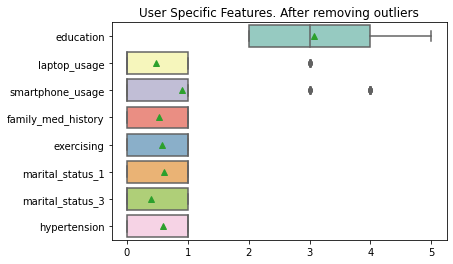

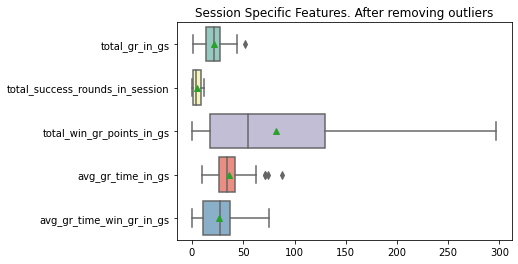

In [7]:
# handling outliers. ignoring outliers for user data.
# The whole process should avoid outliers in the first place.
df = tf.handle_outliers(df)

In [8]:
# Discretize Feauters 
# 1) to calculate variance in same scale 
# 2) because I need to convert any feature of float type to int early.
columns_to_discretize = ['age','avg_gr_time_win_gr_in_gs', 'avg_gr_time_win_gr_in_gs', 'avg_gr_time_in_gs', 
                         'total_win_gr_points_in_gs', 'total_gr_in_gs', 'total_success_rounds_in_session']
fm.discretize_features(df, columns_to_discretize)

,userId,gsId,gsStartTime,age,sex,education,laptop_usage,smartphone_usage,smoking,family_med_history,...,depression,hypertension,total_gr_in_gs,total_success_rounds_in_session,total_win_gr_points_in_gs,avg_gr_time_in_gs,avg_gr_time_win_gr_in_gs,target_class,marital_status_1,marital_status_3
gsId,,,,,,,,,,,,,,,,,,,,,
18245,23.0,18245.0,1.560929e+09,1,1.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0,1,2,0,2,1.0,1.0,0.0
76067,6.0,76067.0,1.555500e+09,0,1.0,4.0,1.0,3.0,0.0,1.0,...,0.0,1.0,5,3,3,4,5,1.0,0.0,1.0
79781,8.0,79781.0,1.557928e+09,5,1.0,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1,3,1,4,5,1.0,1.0,0.0
180144,32.0,180144.0,1.557316e+09,2,1.0,2.0,0.0,4.0,0.0,0.0,...,0.0,1.0,5,1,2,3,1,2.0,1.0,0.0
209758,24.0,209758.0,1.560934e+09,3,1.0,2.0,0.0,0.0,0.0,1.0,...,0.0,1.0,3,1,1,2,1,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5654576,8.0,5654576.0,1.558894e+09,5,1.0,5.0,1.0,1.0,0.0,0.0,...,0.0,0.0,5,3,5,1,4,1.0,1.0,0.0
5723404,4.0,5723404.0,1.556711e+09,5,1.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,5,5,5,3,4,1.0,0.0,1.0
5751092,7.0,5751092.0,1.560013e+09,4,0.0,4.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5,5,5,4,4,1.0,1.0,0.0


,0
total_success_rounds_in_session,3.22
avg_gr_time_win_gr_in_gs,2.96
avg_gr_time_in_gs,2.96
total_gr_in_gs,2.95
total_win_gr_points_in_gs,2.93
age,2.47
smartphone_usage,2.28
education,1.06
laptop_usage,0.86
family_med_history,0.25


Threshold value:  0.16
Features ruled out: 
 ['sex', 'smoking', 'depression']


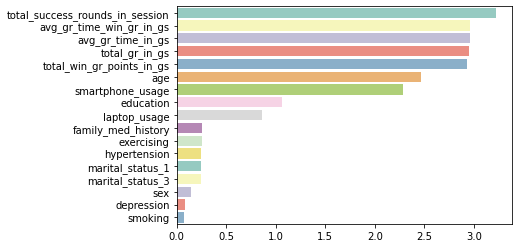

In [9]:
# remove low variance features. VarX = p(1-p). Where p is the probability of a value of a feature.
df = fm.remove_low_variance_features(df, (.8 * (1 - .8)), ddof_val=1)

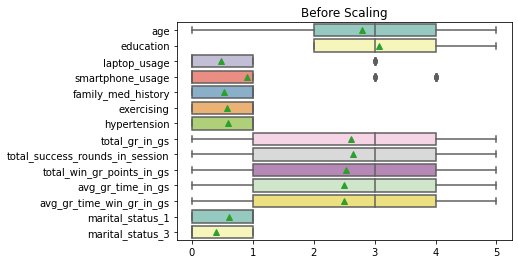

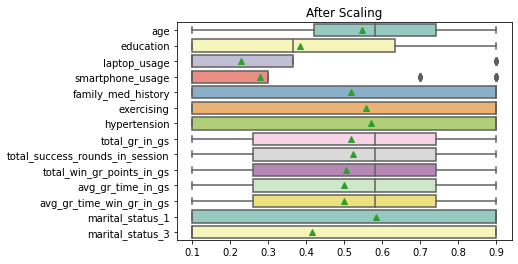

In [10]:
# scaling
columnsToIgnore = ['userId', 'gsId', 'gsStartTime', 'target_class']
df = tf.use_min_max(df, columnsToIgnore)

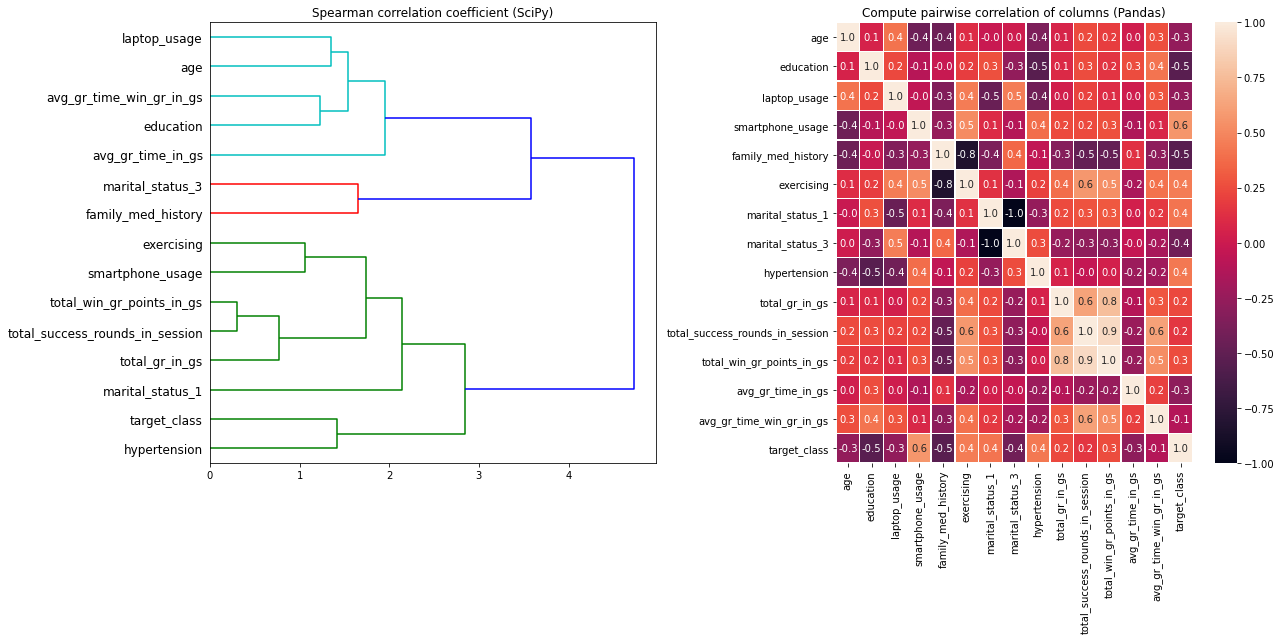

In [11]:
# feature correlation inspection.
# We want to select features highly correlated to the target class and not correlated between them.
fs = ['age', 'education','laptop_usage', 'smartphone_usage', 'family_med_history', 'exercising', 'marital_status_1',
      'marital_status_3', 'hypertension', 'total_gr_in_gs', 'total_success_rounds_in_session', 'total_win_gr_points_in_gs', 
      'avg_gr_time_in_gs', 'avg_gr_time_win_gr_in_gs', 'target_class']
fm.correlation_inspection(df, fs)

In [12]:
all_features = ['age', 'education','laptop_usage', 'smartphone_usage', 'family_med_history', 'exercising',
                'marital_status_1', 'marital_status_3', 'hypertension', 
                'total_gr_in_gs', 'total_success_rounds_in_session', 'total_win_gr_points_in_gs', 
                'avg_gr_time_in_gs', 'avg_gr_time_win_gr_in_gs']
cl1_features = ['laptop_usage', 'age', 'avg_gr_time_win_gr_in_gs', 'education', 'avg_gr_time_in_gs']
cl2_features = ['marital_status_3', 'family_med_history']
cl3_features = ['exercising', 'smartphone_usage', 'total_win_gr_points_in_gs', 'total_success_rounds_in_session',
                'total_gr_in_gs', 'marital_status_1', 'hypertension']
session_features = ['total_gr_in_gs', 'total_success_rounds_in_session', 'total_win_gr_points_in_gs', 
                    'avg_gr_time_in_gs', 'avg_gr_time_win_gr_in_gs']

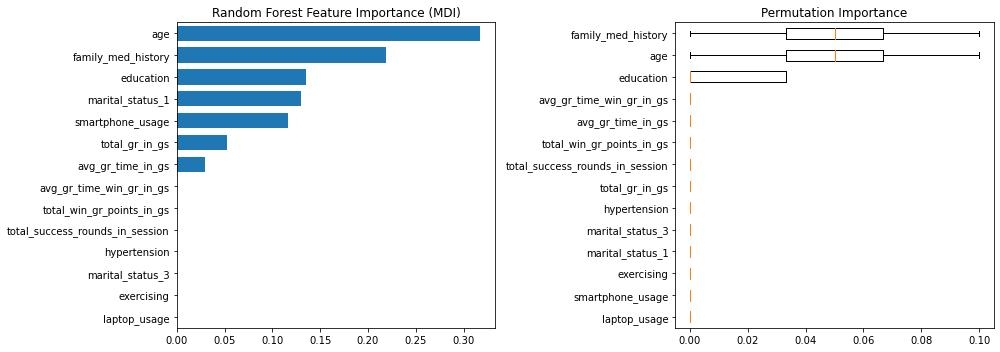

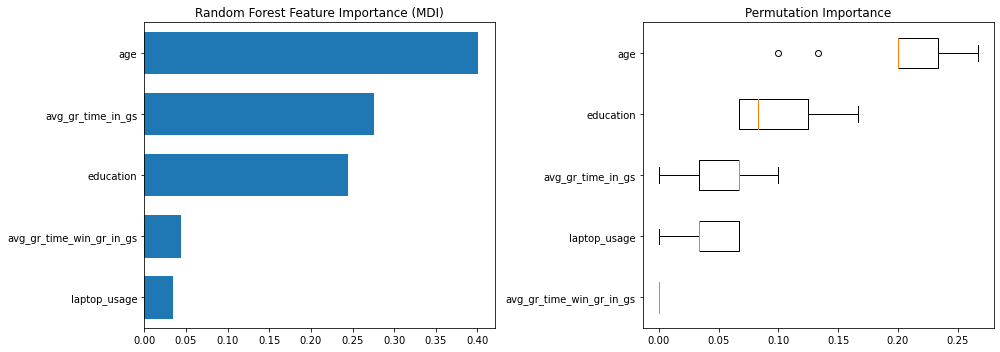

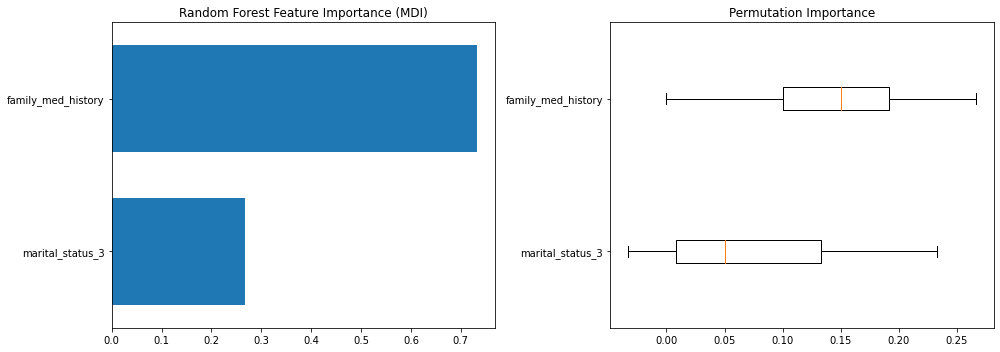

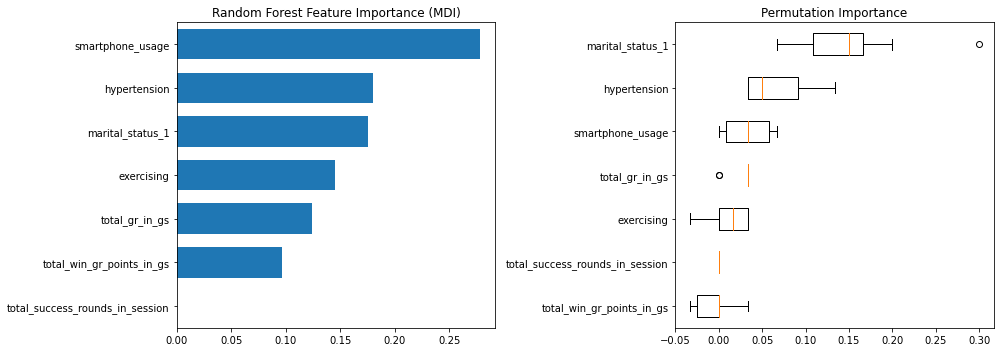

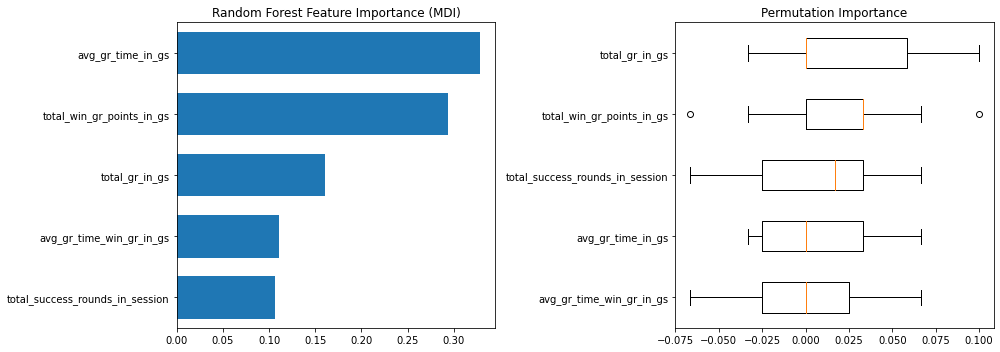

In [13]:
# feature importance inspection using a classifier
# Mean Decrease in Impurity (MDI) feature importance
# Permutation importance of feature values

fm.inspection_using_classifier(df, all_features)
fm.inspection_using_classifier(df, cl1_features)
fm.inspection_using_classifier(df, cl2_features)
fm.inspection_using_classifier(df, cl3_features)
fm.inspection_using_classifier(df, session_features)

<Figure size 432x288 with 0 Axes>

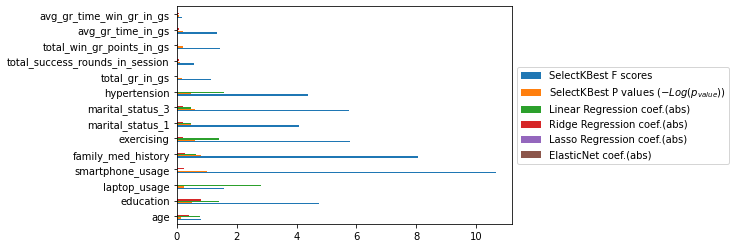

<Figure size 432x288 with 0 Axes>

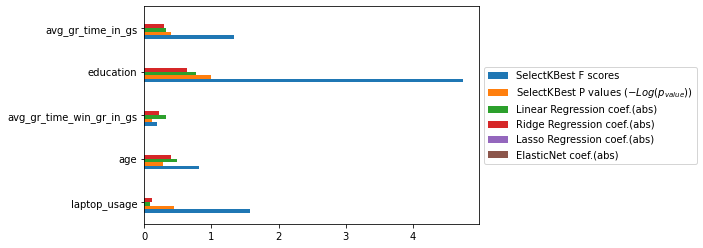

<Figure size 432x288 with 0 Axes>

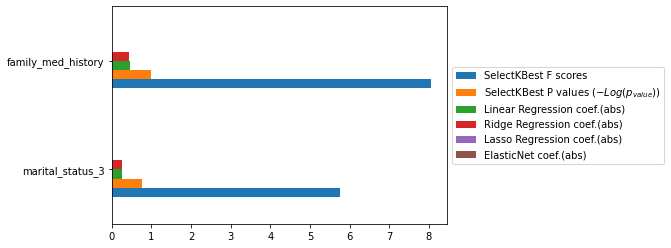

<Figure size 432x288 with 0 Axes>

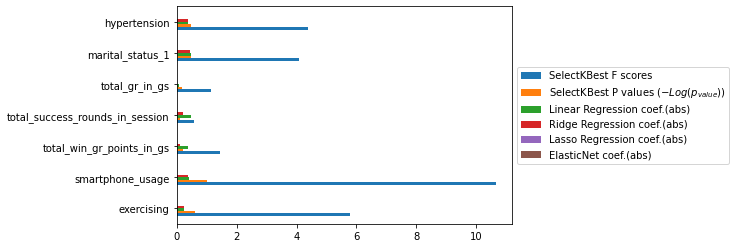

<Figure size 432x288 with 0 Axes>

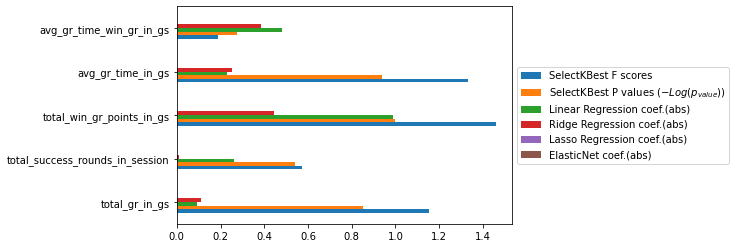

In [14]:
# Feature importance inspection using Univariate Feature Selection
# More specifically, ANOVA and some traditional Regressors

fm.inspection_using_regressors(df, all_features)
fm.inspection_using_regressors(df, cl1_features)
fm.inspection_using_regressors(df, cl2_features)
fm.inspection_using_regressors(df, cl3_features)
fm.inspection_using_regressors(df, session_features)

In [15]:
test_size = 0.25
cross_val_num=3

In [16]:
# split dataframe samples for the training and evaluation process
selected_features = ['education', 'avg_gr_time_in_gs',
                     'family_med_history',
                     'total_gr_in_gs']

x = df[selected_features]
y = df.iloc[:, df.columns.get_loc('target_class')]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=7, test_size=test_size)
print('x:',x.shape,' y:',y.shape)
print('x_train:',x_train.shape,' x_test:',x_test.shape,' y_train:',y_train.shape,'y_test:',y_train.shape)
print("Count of target class label NC: {}".format(sum(y_train==2)))
print("Count of target class label AD-MCI: {} \n".format(sum(y_train==1)))

x: (119, 4)  y: (119,)
x_train: (89, 4)  x_test: (30, 4)  y_train: (89,) y_test: (89,)
Count of target class label NC: 19
Count of target class label AD-MCI: 70 



In [17]:
# train models before oversampling
trained_models = train.train_models(x_train, y_train, x_test, y_test)

trained model:  lr  accuracy:  80.00000000000001
trained model:  dt  accuracy:  96.66666666666667
trained model:  rf  accuracy:  93.33333333333333
trained model:  sv  accuracy:  80.00000000000001
trained model:  kn  accuracy:  96.66666666666667
trained model:  ce  accuracy:  100.0
Total training time: 0.17 seconds


In [18]:
# Accuracy = (True Positives + True Negatives)/(True Positives + True Negatives + False Positives + False Negatives)
# Precision(Positive Predictive Power) = True Positives / (True Positives + False Positives)
# Recall(Sensitivity) = True Positives / (True Positives + False Negatives)
# Specificity = (True Negatives / (True Negatives + False Positives))
# Fscore = 2 * (Precision * Recal)/(Precision + Recal)

Count of label NC in y_test: 6
Count of label AD-MCI in y_test: 24 



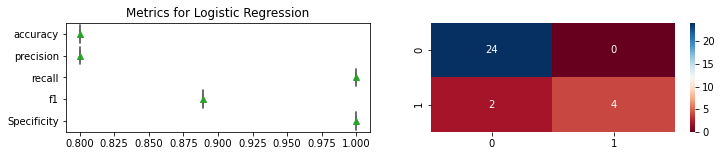

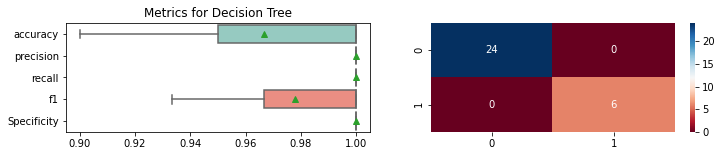

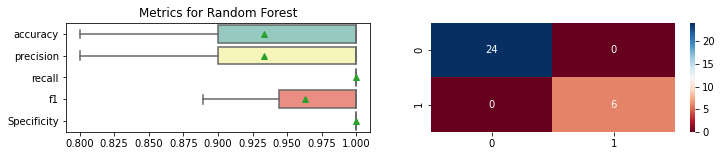

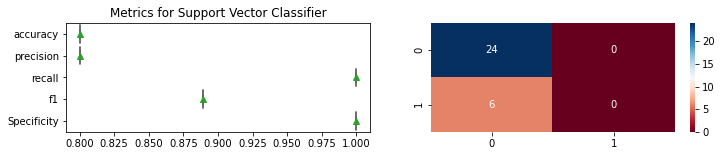

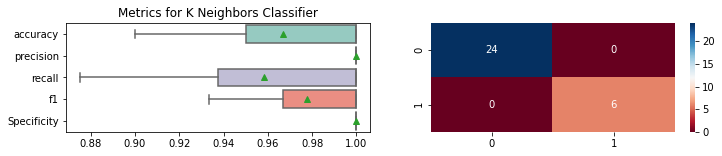

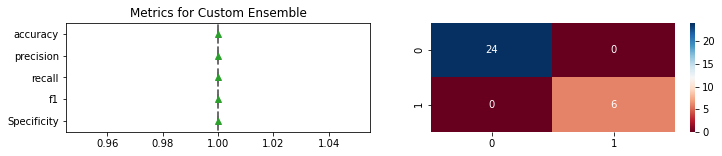

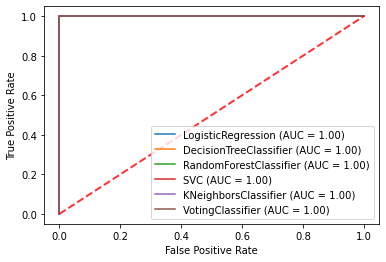

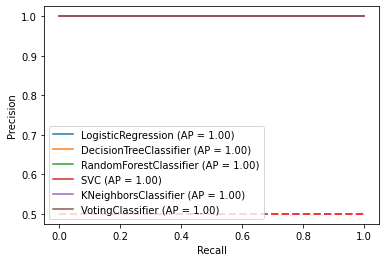

In [19]:
# evaluate models before oversampling
evaluate.generate_metrics(trained_models, x_test, y_test, ['accuracy', 'precision', 'recall', 'f1'], 
                          cv_num=cross_val_num, show_raw_data=False)
print("Count of label NC in y_test: {}".format(sum(y_test==2)))
print("Count of label AD-MCI in y_test: {} \n".format(sum(y_test==1)))

C:\Users\christos\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


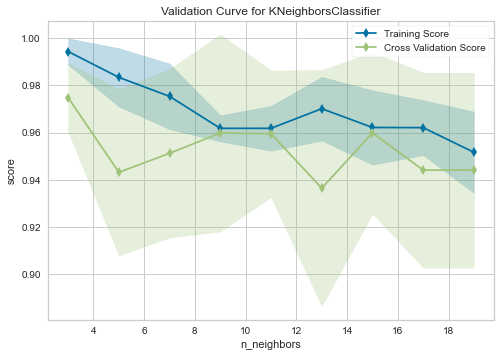

In [20]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.model_selection import ValidationCurve
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(4)
param_range = np.arange(3, 20, 2)

viz = ValidationCurve(
    KNeighborsClassifier(), param_name="n_neighbors",
    param_range=param_range, cv=cv, scoring="f1_weighted", n_jobs=4,
)


# Fit and show the visualizer
viz.fit(x, y)
viz.show()

In [21]:
# apply oversampling
from imblearn.over_sampling import SMOTE

smote_tf = SMOTE(random_state=2)
smote_x, smote_y = smote_tf.fit_sample(x_train, y_train.ravel())
smote_train_x, smote_test_x, smote_train_y, smote_test_y = train_test_split(smote_x, smote_y, random_state=7, 
                                                                            test_size=test_size, stratify=smote_y)

print('smote_x:',smote_x.shape,' smote_y:',smote_y.shape)
print('smote_train_x:',smote_train_x.shape,' smote_test_x:',smote_test_x.shape,
      ' smote_train_y:',smote_train_y.shape,' smote_test_y:',smote_test_y.shape, '\n')

print("After SMOTE OverSampling. Count of label NC: {}".format(sum(smote_y==2)))
print("After SMOTE OverSampling. Count of label AD-MCI: {} \n".format(sum(smote_y==1)))

smote_x: (140, 4)  smote_y: (140,)
smote_train_x: (105, 4)  smote_test_x: (35, 4)  smote_train_y: (105,)  smote_test_y: (35,) 

After SMOTE OverSampling. Count of label NC: 70
After SMOTE OverSampling. Count of label AD-MCI: 70 



In [22]:
# train models after oversampling
trained_models_smote = train.train_models(smote_train_x, smote_train_y, smote_test_x, smote_test_y)

trained model:  lr  accuracy:  85.85858585858585
trained model:  dt  accuracy:  80.55555555555554
trained model:  rf  accuracy:  91.66666666666666
trained model:  sv  accuracy:  60.60606060606061
trained model:  kn  accuracy:  88.63636363636364
trained model:  ce  accuracy:  91.66666666666666
Total training time: 0.17 seconds


C:\Users\christos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\christos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Count of label NC in y_test: 18
Count of label AD-MCI in y_test: 17 



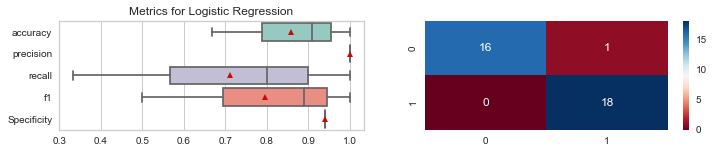

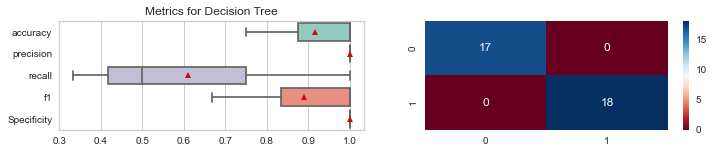

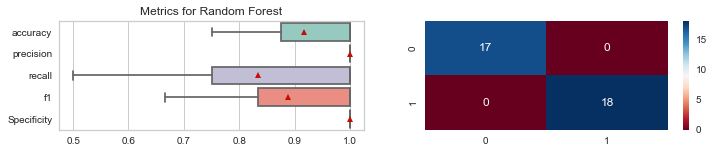

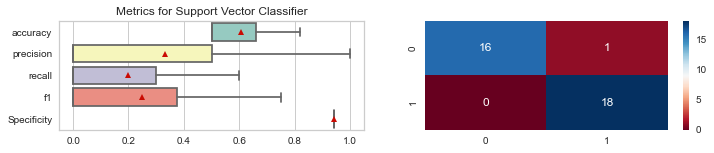

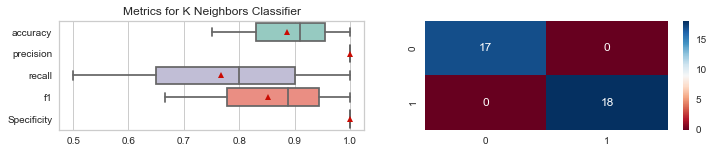

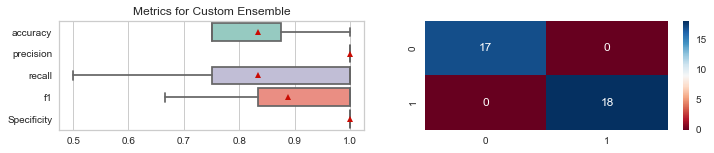

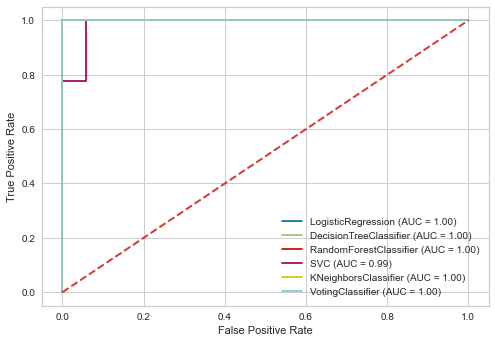

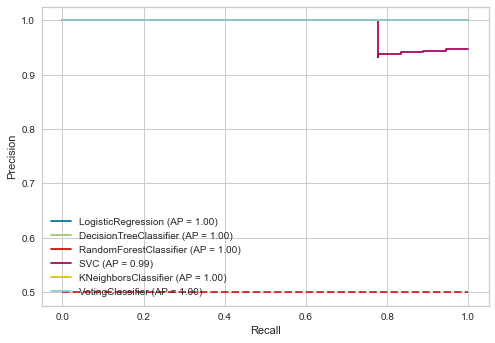

In [23]:
# evaluate models after sampling
evaluate.generate_metrics(trained_models_smote, smote_test_x, smote_test_y, ['accuracy', 'precision', 'recall', 'f1'], 
                          cv_num=cross_val_num, show_raw_data=False)
print("Count of label NC in y_test: {}".format(sum(smote_test_y==2)))
print("Count of label AD-MCI in y_test: {} \n".format(sum(smote_test_y==1)))

C:\Users\christos\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


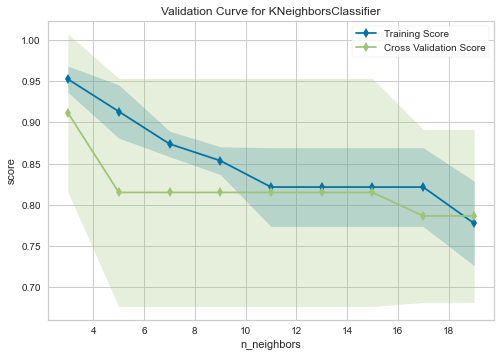

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.model_selection import ValidationCurve
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(4)
param_range = np.arange(3, 20, 2)

viz = ValidationCurve(
    trained_models_smote.get('K Neighbors Classifier'), param_name="n_neighbors",
    param_range=param_range, cv=cv, scoring="f1_weighted", n_jobs=4,
)


# Fit and show the visualizer
viz.fit(smote_test_x, smote_test_y)
viz.show()

pca_x: (140, 2)
explained variance ratio (first two components): [0.53707859 0.1888063 ]


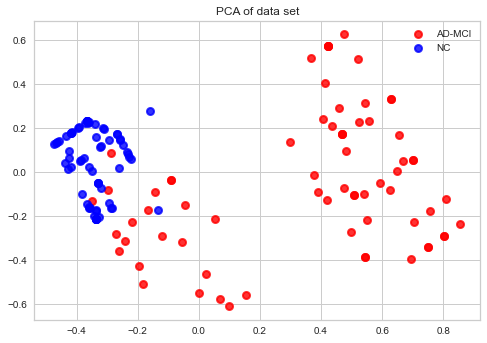

In [25]:
# apply dimensionality reduction using PCA
# example https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_x = pca.fit(smote_x).transform(smote_x)
print('pca_x:',pca_x.shape)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['red', 'blue']
lw = 2
for color, i, target_name in zip(colors, [1, 2], ['AD-MCI','NC']):
    plt.scatter(pca_x[smote_y == i, 0], pca_x[smote_y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of data set')
plt.show();

In [26]:
# split of pca_x and smote_y to train test data set
pca_train_x, pca_test_x, pca_train_y, pca_test_y = train_test_split(pca_x, smote_y, random_state=7, 
                                                                    test_size=test_size, stratify=smote_y)

trained model:  lr  accuracy:  85.85858585858585
trained model:  dt  accuracy:  80.55555555555554
trained model:  rf  accuracy:  91.66666666666666
trained model:  sv  accuracy:  60.60606060606061
trained model:  kn  accuracy:  88.63636363636364
trained model:  ce  accuracy:  83.33333333333334
Total training time: 0.16 seconds


C:\Users\christos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\christos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Count of label NC in y_test: 18
Count of label AD-MCI in y_test: 17 



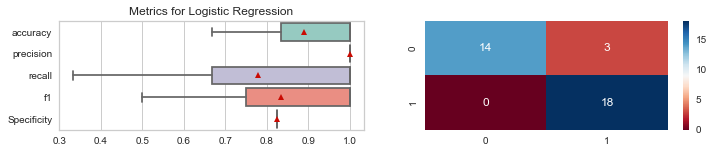

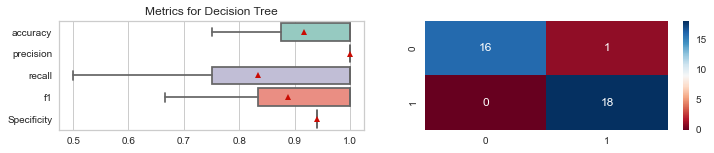

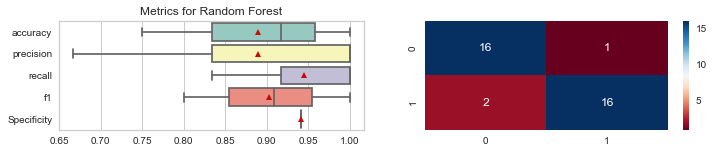

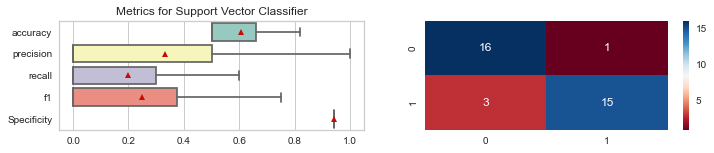

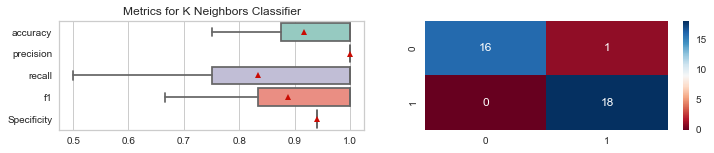

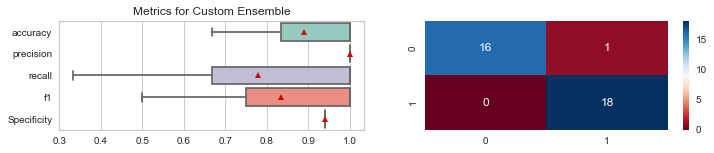

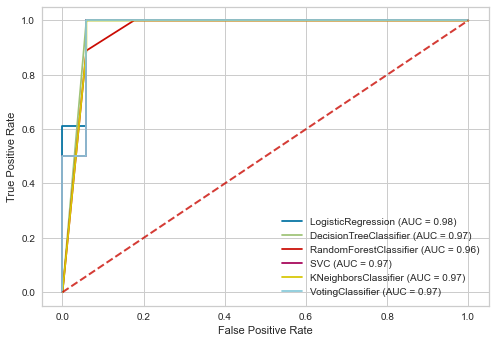

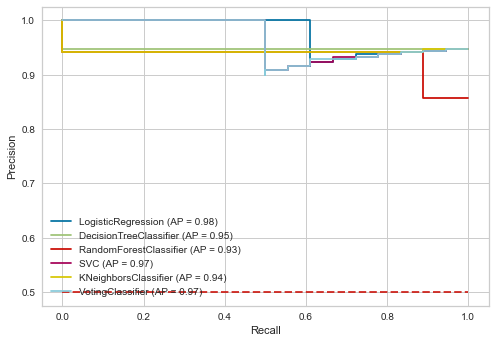

In [27]:
# train and evaluate models using the 2 components from PCA
trained_models_using_pca_comp = train.train_models(pca_train_x, smote_train_y, smote_test_x, smote_test_y)
evaluate.generate_metrics(trained_models_using_pca_comp, pca_test_x, pca_test_y, 
                          ['accuracy', 'precision', 'recall', 'f1'], cv_num=cross_val_num, show_raw_data=False)
print("Count of label NC in y_test: {}".format(sum(smote_test_y==2)))
print("Count of label AD-MCI in y_test: {} \n".format(sum(smote_test_y==1)))

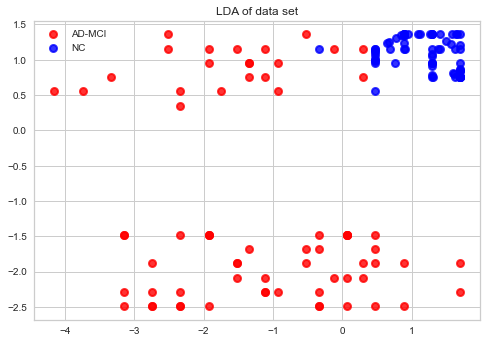

In [28]:
# apply dimensionality reduction using LDA

# creating two components separately due to the know restriction 
# n_components cannot be larger than min(n_features, n_classes - 1)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
lda = LDA(n_components=1)

# print(smote_x.iloc[:, [0,1,2,3]])
# education  avg_gr_time_in_gs  family_med_history  total_gr_in_gs
# Selecting (avg_gr_time_in_gs, family_med_history) and (education, total_gr_in_gs) based on Spearman correlation coefficient

# print('lda_x_one from:',smote_x.iloc[:, [0,3]].shape)
lda_x_one = lda.fit_transform(smote_x.iloc[:, [0,3]], smote_y)
# print('lda_x_one:', lda_x_one.shape)

# print('lda_x_two from:',smote_x.iloc[:, [1,2]].shape)
lda_x_two = lda.fit_transform(smote_x.iloc[:, [1,2]], smote_y)
# print('lda_x_two:', lda_x_two.shape)

lda_x = np.concatenate((lda_x_one, lda_x_two),axis=1)
# print('lda_x:',lda_x.shape)

plt.figure()
colors = ['red', 'blue']
lw = 2
for color, i, target_name in zip(colors, [1, 2], ['AD-MCI','NC']):
    plt.scatter(lda_x[smote_y == i, 0], lda_x[smote_y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of data set')
plt.show();

In [29]:
# split of pca_x and smote_y to train test data set
lda_train_x, lda_test_x, lda_train_y, lda_test_y = train_test_split(lda_x, smote_y, random_state=7, 
                                                                    test_size=test_size, stratify=smote_y)

trained model:  lr  accuracy:  85.85858585858585
trained model:  dt  accuracy:  80.55555555555554
trained model:  rf  accuracy:  91.66666666666666
trained model:  sv  accuracy:  60.60606060606061
trained model:  kn  accuracy:  88.63636363636364
trained model:  ce  accuracy:  83.33333333333334
Total training time: 0.18 seconds
Count of label NC in y_test: 18
Count of label AD-MCI in y_test: 17 



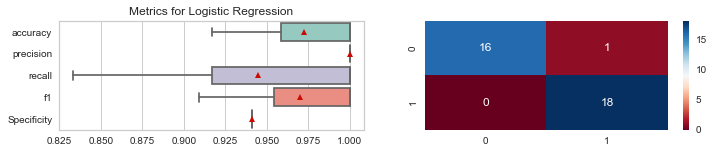

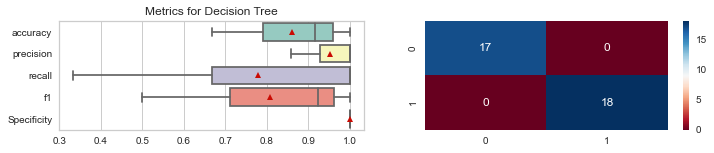

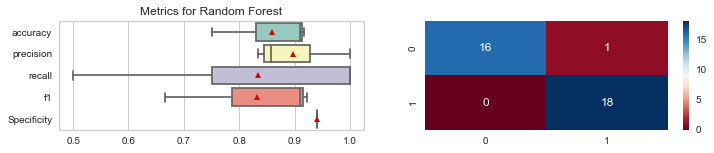

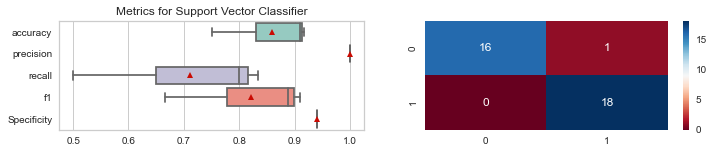

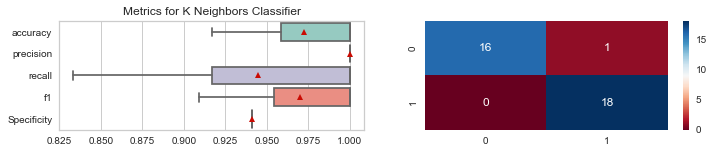

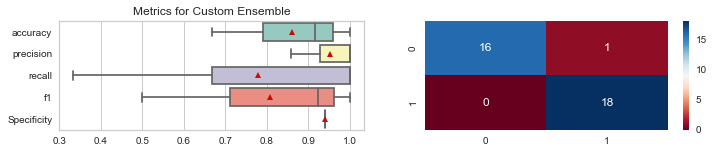

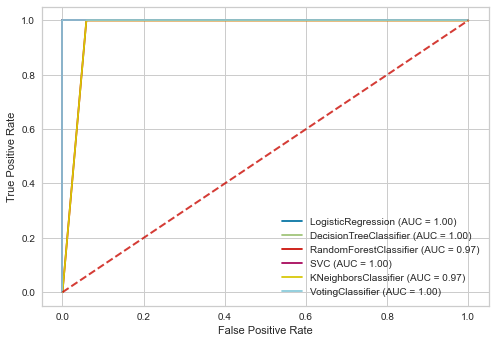

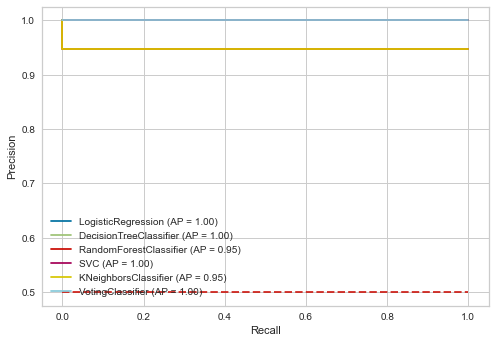

In [30]:
# train and evaluate models using the 2 components from LDA
trained_models_using_lda = train.train_models(lda_train_x, smote_train_y, smote_test_x, smote_test_y)
evaluate.generate_metrics(trained_models_using_lda, lda_test_x, lda_test_y, 
                          ['accuracy', 'precision', 'recall', 'f1'], cv_num=cross_val_num, show_raw_data=False)
print("Count of label NC in y_test: {}".format(sum(smote_test_y==2)))
print("Count of label AD-MCI in y_test: {} \n".format(sum(smote_test_y==1)))

C:\Users\christos\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


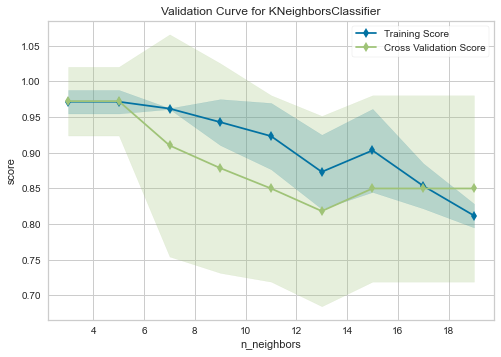

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.model_selection import ValidationCurve
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(4)
param_range = np.arange(3, 20, 2)

viz = ValidationCurve(
    trained_models_using_lda.get('K Neighbors Classifier'), param_name="n_neighbors",
    param_range=param_range, cv=cv, scoring="f1_weighted", n_jobs=4,
)


# Fit and show the visualizer
viz.fit(lda_test_x, lda_test_y)
viz.show()

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


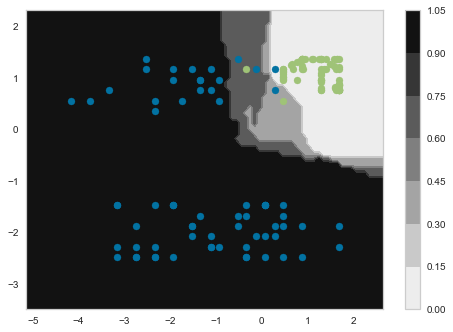

In [32]:
# probability decision surface for logistic regression on a binary classification dataset
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# generate dataset
# X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
# lda_x, smote_y

# define bounds of the domain
min1, max1 = lda_x[:, 0].min()-1, lda_x[:, 0].max()+1
min2, max2 = lda_x[:, 1].min()-1, lda_x[:, 1].max()+1

# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))

# # # define the model
# model = RandomForestClassifier(n_estimators=2, random_state=7)
# print('model:', type(model))
# # fit the model
# model.fit(lda_x, smote_y)
# # make predictions for the grid
# yhat = model.predict_proba(grid)

# print('model d:', type(trained_models_using_lda.get('Logistic Regression')))
# sv = trained_models_using_lda.get('Logistic Regression')
# sv = trained_models_using_lda.get('Decision Tree')
# sv = trained_models_using_lda.get('Random Forest')
sv = trained_models_using_lda.get('K Neighbors Classifier')
# sv = trained_models_using_lda.get('Custom Ensemble')
print(type(sv))
yhat = sv.predict_proba(grid)

# keep just the probabilities for class 0
yhat = yhat[:, 0]
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = pyplot.contourf(xx, yy, zz, cmap='binary')
# add a legend, called a color bar
pyplot.colorbar(c)
# create scatter plot for samples from each class
for class_value in range (1, 3):
    # get row indexes for samples with this class
    row_ix = where(smote_y == class_value)
    # create scatter of these samples
    pyplot.scatter(lda_x[row_ix, 0], lda_x[row_ix, 1], cmap='Paired')
# show the plot
pyplot.show()